In [1]:
import pandas as pd

# load the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
# checking the matrix of dataset
# rows=7043, column=21
df.shape

(7043, 21)

In [3]:
# droping "customerID" column, since it is not making any impact or sense here
df.drop(['customerID'], axis='columns', inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# now, checking the matrix of dataset after droping "customerID" column
# rows=7043, column=20
df.shape

(7043, 20)

In [5]:
# cheking the data types of all the features of columns in dataset
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
# "TotalCharges", data type is object but datavalues are numeric, so need to explore it
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
# changing the string data to numeric
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [8]:
# checking if any row is null or empty
df.TotalCharges.isnull().sum()

11

In [9]:
df.TotalCharges.notnull().sum()

7032

In [10]:
7032 + 11

7043

In [11]:
# remove the null column because it is very less in number i.e. only 11 elements
df.dropna(subset=['TotalCharges'], inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [12]:
# now the data types of "TotalCharges" column change to 'float64', which is acceptable
df.TotalCharges.dtypes

dtype('float64')

In [13]:
# checking if any row is null or empty
df.MonthlyCharges.isnull().sum()

0

In [14]:
# checking if any row is null or empty
df.tenure.isnull().sum()

0

In [15]:
# number of customer not leaving 
df[df.Churn=='No'].shape

(5163, 20)

In [16]:
# number of customer leaving 
df[df.Churn=='Yes'].shape

(1869, 20)

In [17]:
# so, approx 26% of customer are leaving
(1869/(5163+1869))

0.26578498293515357

In [18]:
import matplotlib.pyplot as plt

# plot histogram with number of customer not leaving versus tenure
# plot histogram with number of customer not leaving versus monthly charges
# plot histogram with number of customer not leaving versus total charges

In [19]:
# customer not leaving versus tenure
tenure_leave_no = df[df.Churn=='No'].tenure

In [20]:
# customer leaving versus tenure
tenure_leave_yes = df[df.Churn=='Yes'].tenure

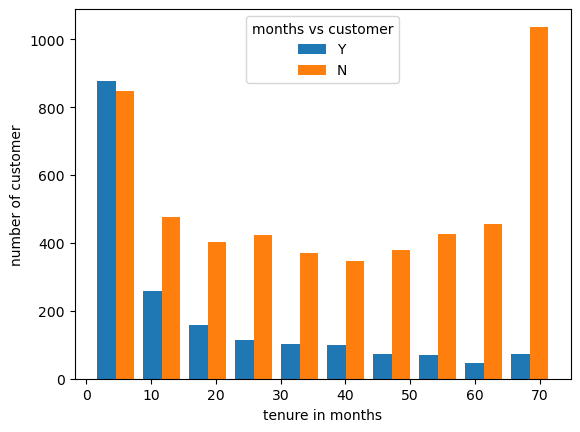

In [21]:
plt.hist([tenure_leave_yes, tenure_leave_no], r)
plt.xlabel('tenure in months')
plt.ylabel('number of customer')
plt.legend('YN',title='months vs customer')

In [22]:
# customer not leaving versus monthly charges
monthly_leave_no = df[df.Churn=='No'].MonthlyCharges

In [23]:
# customer leaving versus monthly charges
monthly_leave_yes = df[df.Churn=='Yes'].MonthlyCharges

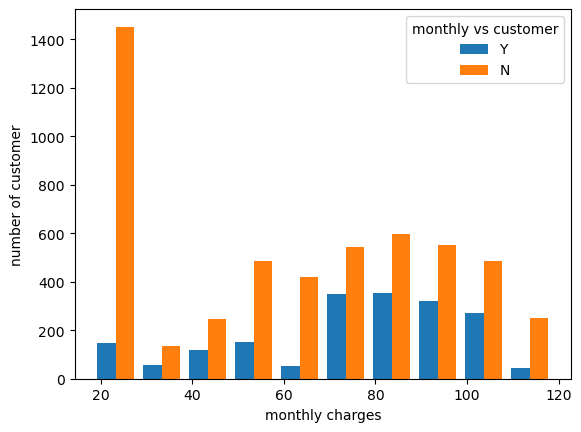

In [24]:
plt.hist([monthly_leave_yes, monthly_leave_no])
plt.xlabel('monthly charges')
plt.ylabel('number of customer')
plt.legend('YN',title='monthly vs customer')

In [25]:
# customer not leaving versus total charges
total_leave_no = df[df.Churn=='No'].TotalCharges

In [26]:
# customer leaving versus total charges
total_leave_yes = df[df.Churn=='Yes'].TotalCharges

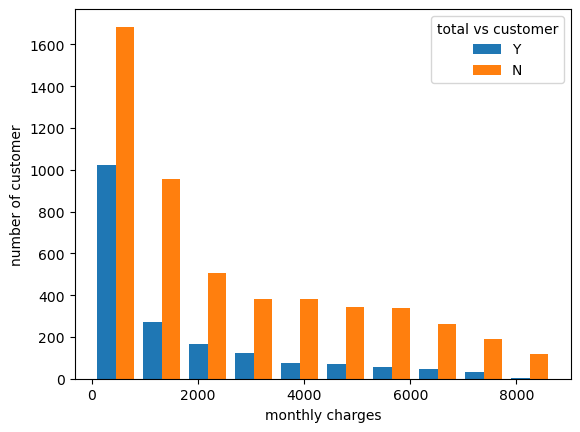

In [27]:
plt.hist([total_leave_yes, total_leave_no])
plt.xlabel('monthly charges')
plt.ylabel('number of customer')
plt.legend('YN',title='total vs customer')

Text(0, 0.5, 'number of months')

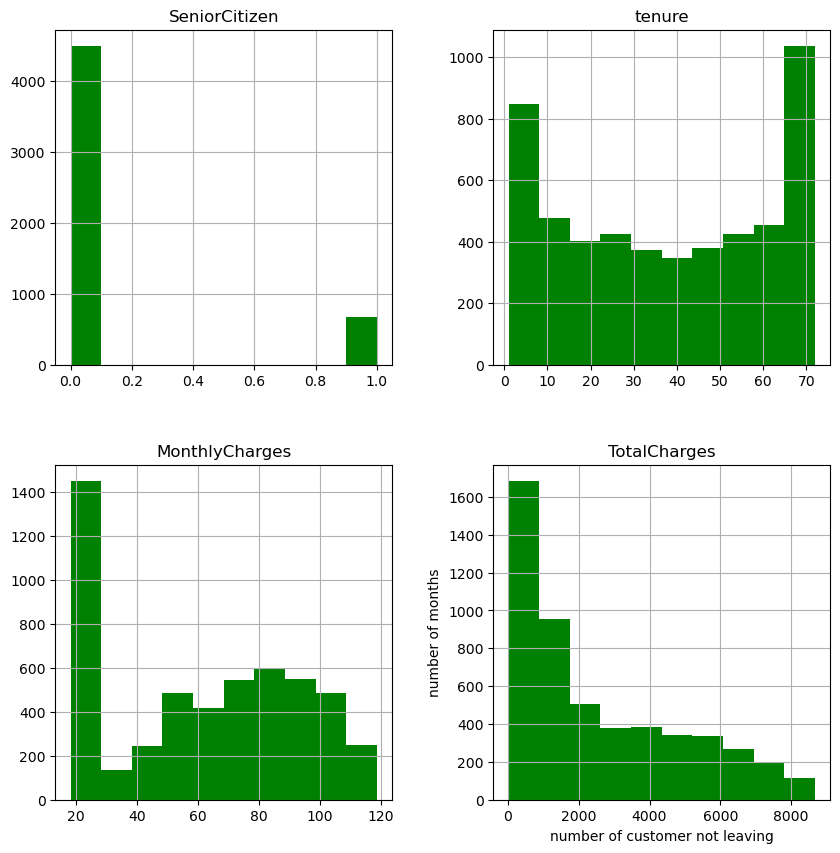

In [28]:
df[df.Churn=='No'].hist(figsize=(10,10),color='green')
plt.xlabel('number of customer not leaving')
plt.ylabel('number of months')
# df.tenure.hist(color='brown',)

array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>]], dtype=object)

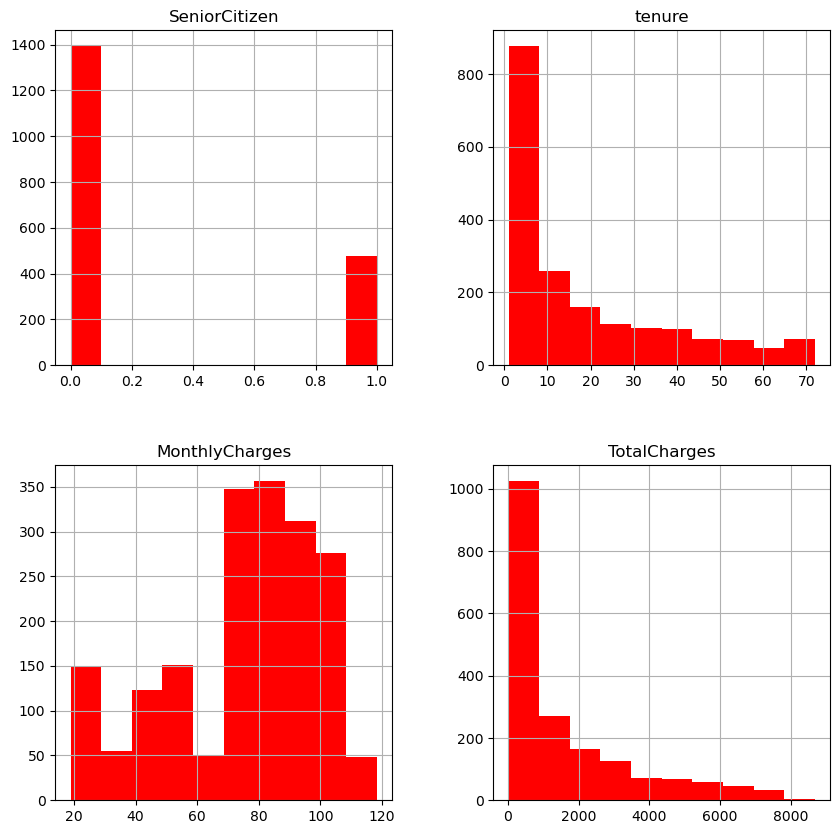

In [29]:
# plot histogram with number of customer leaving versus tenure
# plot histogram with number of customer leaving versus monthly charges
# plot histogram with number of customer leaving versus total charges
df[df.Churn=='Yes'].hist(figsize=(10, 10),color='red',)

<Axes: >

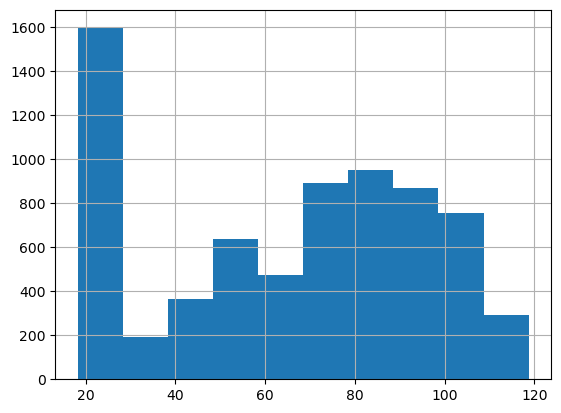

In [30]:
df.MonthlyCharges.hist()

<Axes: >

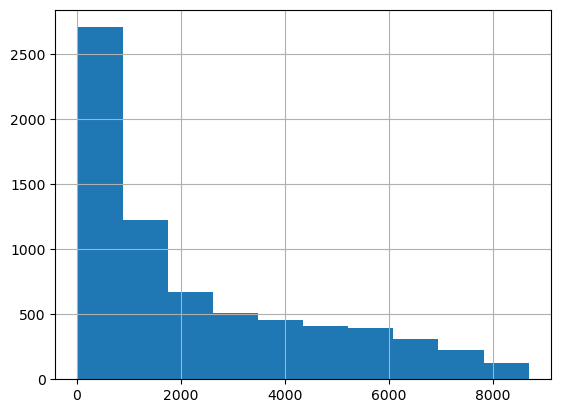

In [31]:
df.TotalCharges.hist()

In [32]:
# here, we need to convert all object data types into either 'int or float' i.e. numeric data type.
# converting 'Female':0, 'Male':1, since ml understand numeric data.
# dictionary
# gender2num ={'Female':0, 'Male':1}
# print(df.gender.unique())
# df.gender = [gender2num[i] for i in df.gender]
# df

In [33]:
# df.Partner = [str2num[i] for i in df.Partner]
# df.Dependents = [str2num[i] for i in df.Dependents]
# df.PhoneService = [str2num[i] for i in df.PhoneService]

# print(df.MultipleLines.nunique())
# print(df.MultipleLines.str.contains('No phone service').sum())
# print(df.MultipleLines.eq('No phone service').sum())

In [34]:
# converting 'No phone service':0, 'Yes':1, 'No':0, 'No internet service':0, since ml understand numeric data.
# dictionary
str2num = {'No phone service':0, 'Yes':1, 'No':0, 'No internet service':0, 'Female':0, 'Male':1}
df1 = df.drop(['SeniorCitizen','tenure','InternetService','Contract','PaymentMethod','MonthlyCharges','TotalCharges'], axis='columns')

# df1.MultipleLines = [str2num[i] for i in df1.MultipleLines]
# df1.MultipleLines.unique()
for col in df1:
    df1[col] = [str2num[i] for i in df1[col]]

In [35]:
# check if any value is null
df1.isnull().sum()

gender              0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
PaperlessBilling    0
Churn               0
dtype: int64

In [36]:
df1.dtypes

gender              int64
Partner             int64
Dependents          int64
PhoneService        int64
MultipleLines       int64
OnlineSecurity      int64
OnlineBackup        int64
DeviceProtection    int64
TechSupport         int64
StreamingTV         int64
StreamingMovies     int64
PaperlessBilling    int64
Churn               int64
dtype: object